# 1-Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 2-Get the data

In [2]:
path1 = 'obtrain-ml.csv'

df = pd.read_csv(path1, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,0.345081,0.746197,-1.090600,-1.080283,-0.271744,0.071893,-0.750719,1.320688,0.695390,1.163406,...,0.432794,-0.343324,-1.237080,0.392683,-1.937201,1.273496,0.471206,0.088425,-0.754906,-1.0
1,-1.238198,-0.990755,0.471342,-0.101829,-1.129983,0.341522,1.189618,-0.720331,0.104180,-1.092291,...,-1.290025,0.139505,0.117134,-0.186936,0.408618,0.237257,-1.110670,-0.645378,1.779565,-1.0
2,-0.008384,0.834482,0.726280,-1.889651,0.927735,-0.167712,0.570338,0.808293,-1.187723,-0.093282,...,-1.068939,-1.592181,-0.709196,0.754166,-0.060812,-0.646838,-0.774647,0.161045,-1.289014,-1.0
3,-0.082521,0.900501,1.673648,0.935160,1.558300,-0.406216,-0.735869,0.540115,-0.494145,-0.496822,...,0.453064,0.929381,1.205144,-1.941207,0.246593,0.710245,1.027464,0.483457,1.000004,1.0
4,-2.134288,-0.561238,-1.293037,-0.703646,1.918425,-1.160573,-0.106683,0.546631,-0.006137,0.632034,...,-2.686108,0.544527,0.886340,-0.885839,0.574833,-1.298381,0.814288,-0.834902,0.195764,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 560 entries, 0 to 559
dtypes: float64(560)
memory usage: 8.5 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000
mean,-4.533041e-16,2.373102e-16,3.731460e-16,5.121459e-16,-2.249312e-16,-5.644374e-16,-1.430522e-15,1.479372e-16,1.797035e-16,-3.349959e-16,...,-9.074824e-16,4.851675e-17,1.095790e-15,6.250556e-15,3.201051e-16,5.143663e-15,7.799317e-18,-9.864332e-16,-9.859336e-16,0.00000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.00025
min,-3.806609e+00,-3.249674e+00,-3.340611e+00,-3.298440e+00,-3.228107e+00,-3.259287e+00,-3.237158e+00,-3.518765e+00,-3.117747e+00,-3.669559e+00,...,-4.123012e+00,-3.089802e+00,-3.754656e+00,-3.578335e+00,-3.839075e+00,-3.471544e+00,-3.735818e+00,-3.734729e+00,-4.071743e+00,-1.00000
25%,-6.518120e-01,-8.620804e-01,-6.931272e-01,-6.918625e-01,-6.489926e-01,-6.539326e-01,-6.638078e-01,-7.164303e-01,-6.833506e-01,-6.996555e-01,...,-6.071954e-01,-6.765307e-01,-6.444703e-01,-6.529039e-01,-6.870561e-01,-6.731509e-01,-6.744861e-01,-6.744321e-01,-6.624165e-01,-1.00000
50%,-1.110822e-02,-7.019288e-03,-2.689188e-04,-2.197787e-02,-2.821030e-03,-1.339113e-02,2.389254e-02,3.500354e-02,1.872041e-02,-2.242355e-03,...,2.640873e-02,-1.159443e-02,3.245307e-02,-5.806578e-02,-5.655842e-02,9.680798e-03,3.983293e-02,1.050333e-02,9.302599e-03,0.00000
75%,6.537779e-01,8.554428e-01,7.047071e-01,6.453907e-01,6.784400e-01,6.430344e-01,6.495657e-01,5.598357e-01,6.493064e-01,6.732397e-01,...,6.933908e-01,6.625549e-01,6.595602e-01,6.322097e-01,7.105999e-01,6.671100e-01,6.825393e-01,6.653655e-01,6.653531e-01,1.00000
max,2.965983e+00,3.193342e+00,2.940053e+00,2.732206e+00,3.611380e+00,3.427170e+00,3.158721e+00,3.343066e+00,3.233024e+00,3.241649e+00,...,3.287154e+00,3.635809e+00,3.316442e+00,3.455745e+00,4.175236e+00,3.360887e+00,3.527163e+00,4.544100e+00,3.773016e+00,1.00000


## Train-Test Split
The data is split into train and test datasets in a stratified fashion using the target label. The training dataset includes 75% of the original dataset.

In [7]:
from sklearn.cross_validation import train_test_split

y = df[559]
X = df.drop(559,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 15) 

## Feature Engineering
The number of missing values in each column of the training and test datasets are as follows:

In [8]:
print ('Is there any null value in the training dataset?   %s' % (X_train.isnull().any()).any())
print ('Is there any null value in the test dataset?       %s' % (X_test.isnull().any()).any())

Is there any null value in the training dataset?   False
Is there any null value in the test dataset?       False


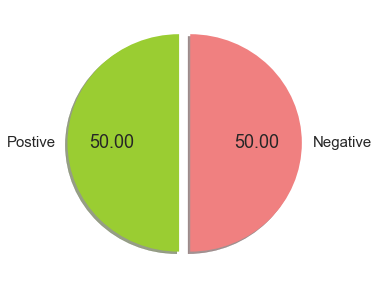

In [9]:
sns.set_context('notebook',font_scale=1.5)
labels =['Postive','Negative']
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(y_train.value_counts(),labels=labels,colors=colors,explode=explode, shadow=True, startangle=90, autopct='%.2f');

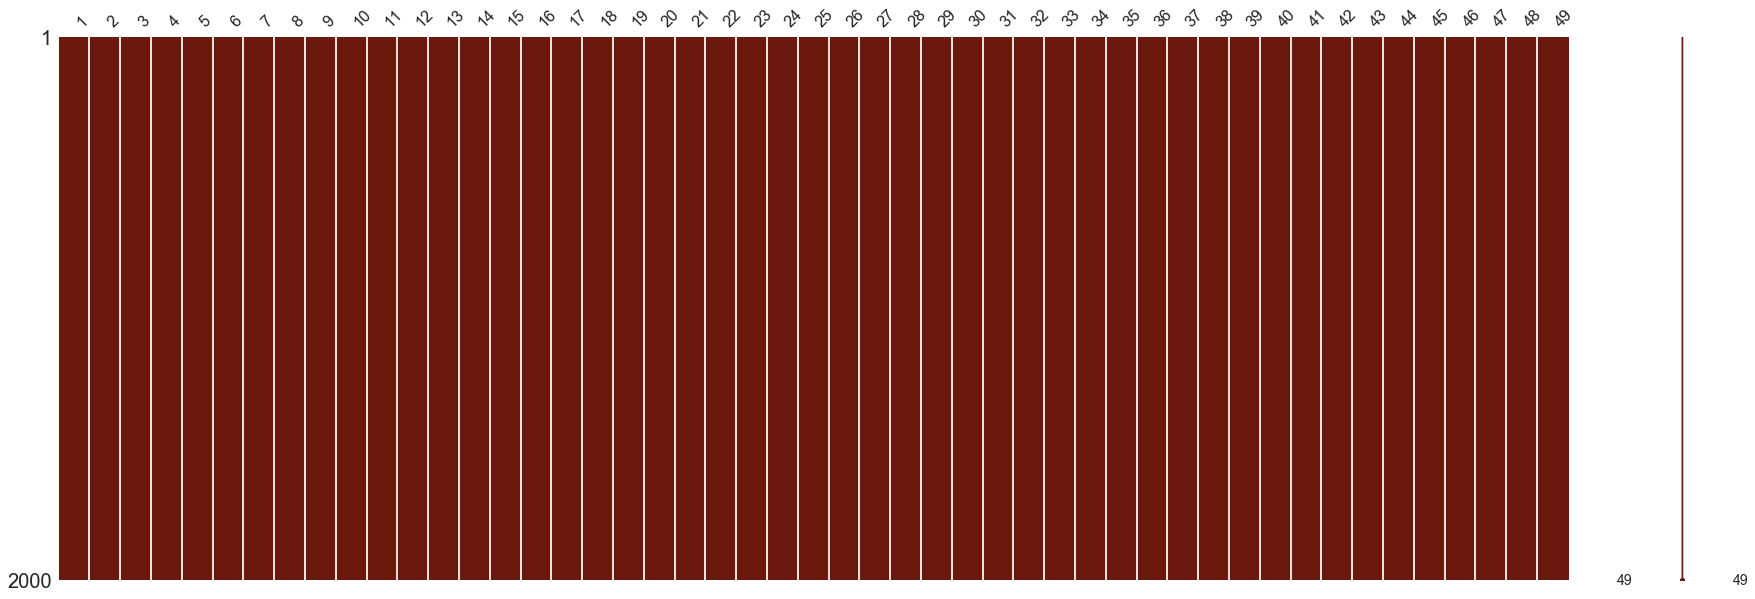

In [118]:
#Use blank/white to visualize all the missing values accross the variables
train_copy = X
train_copy = train_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,1:50], figsize=(30, 10), color=(0.42, 0.1, 0.05))

In [119]:
#count the numbers of int64, float64, bool or object/string features
train = X
int_features = train.select_dtypes(include = ['int64']).columns.values
float_features = train.select_dtypes(include = ['float64']).columns.values
bool_features= train.select_dtypes(include = ['bool']).columns.values
categorical_features = train.select_dtypes(include = ['object']).columns.values
print('int_features:', int_features) #, 'count of int_features:'count(int_features)
print('float_features:', float_features)
print('bool_features:', bool_features)
print('categorical_features:', categorical_features)

int_features: []
float_features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

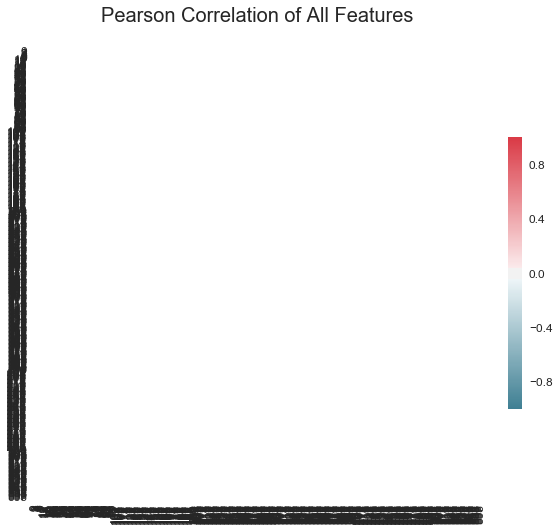

In [120]:
corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


plt.title('Pearson Correlation of All Features', y=1.05, size=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# 1. Simple NN 101 in Keras

In [12]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.initializers import glorot_normal

In [13]:
#Vectorize the dataset for Keras
df[559]=df[559].replace(-1, 0) #replace -1 with 0 for binary classification (0,1)
dataset = df.values
# split into input (X) and output (Y) variables
X = dataset[:,0:559]
Y = dataset[:,559]
# Y = [x if x==1 else 0 for x in Y] this would create a list of 1500 arrays
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=42)

In [14]:
n_input_dim = X.shape[1]
n_output_dim = 1 # Binary classification
n_units = 1024

# Define network
model = Sequential()
model.add(Dense(n_units, input_dim=n_input_dim, activation='elu',
               kernel_initializer=glorot_normal(seed=0)))
model.add(Dense(n_output_dim, activation='sigmoid',
               kernel_initializer=glorot_normal(seed=0)))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

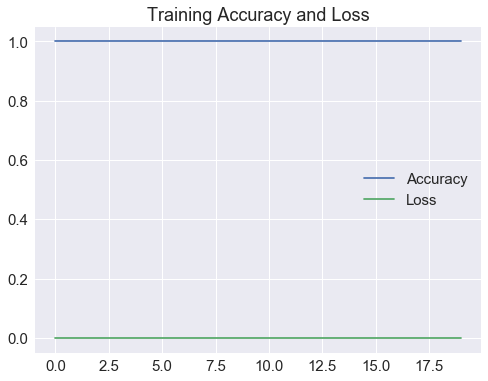

CPU times: user 46.1 s, sys: 5.23 s, total: 51.3 s
Wall time: 19.9 s


In [21]:
%%time
# Fit the model
hist = model.fit(X_train, Y_train, validation_split=0.33, epochs=20, batch_size=5, verbose=0)

plt.figure(figsize=(8,6))
plt.plot(hist.history['acc'], label='Accuracy')
plt.plot(hist.history['loss'], label='Loss')
plt.legend(loc='best')
plt.title('Training Accuracy and Loss')
plt.show()

In [22]:
results = model.evaluate(X_test, Y_test, batch_size=len(Y_test))
print("Test Loss: %.3f\nTest Accuracy: %.3f" %(results[0], results[1]))

400/400 [==============================] - 0s 42us/step
Test Loss: 4.619
Test Accuracy: 0.545


# 2. NN+kfold Stratification

In [23]:
# Baseline model for the neural network. We choose a hidden layer of 600 neurons. The lesser number of neurons helps to eliminate the redundancies in the data and select the more important features.
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=n_input_dim, kernel_initializer=glorot_normal(seed=0), activation='relu'))
    model.add(Dense(1, kernel_initializer=glorot_normal(seed=0), activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
# Evaluate model using standardized dataset. 
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 56.40% (2.54%)


Try 1st nuron=559, normal initializer, and relu

In [76]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(559, input_dim=559, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [77]:
# evaluate model with standardized dataset
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 58.65% (2.98%)


In [78]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 58.50% (2.97%)


In [ ]:
%%time
# larger model
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=559, kernel_initializer='normal', activation='relu'))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
results = model.evaluate(X_test, Y_test, batch_size=len(Y_test))
print("Test Loss: %.3f\nTest Accuracy: %.3f" %(results[0], results[1]))
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
def data():
    '''
    Data providing function:

    This function is separated from model() so that hyperopt
    won't reload data for each evaluation run.
    '''
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=42)
    return X_train, Y_train, X_test, Y_test

In [ ]:
def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:

    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    '''
    model = Sequential()
    model.add(Dense(1024, kernel_initializer='normal', input_shape=(559,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              nb_epoch=1,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [ ]:
X_train, Y_train, X_test, Y_test = data()

best_run, best_model = optim.minimize(model=model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=5,
                                      trials=Trials(),
                                      notebook_name='NN_Keras_HyperTune_notebook')

In [ ]:
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)